In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nibabel.testing import data_path
import os
import nibabel as nib
import cv2 as cv
from nibabel.testing import data_path
from PIL import Image
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from matplotlib import animation, rc
from IPython.display import HTML, Image
rc('animation', html='html5')


D:\Anaconda\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
from matplotlib.animation import FuncAnimation, PillowWriter
def grayToColored (VolumePath,MaskPath,alpha=0.2):
    def normalize(arr):
        return (255*(arr - np.min(arr)) / (np.max(arr) - np.min(arr)))

    Volume = nib.load(VolumePath).get_fdata()
    Mask = nib.load(MaskPath).get_fdata()
    Masklabel=[]
    masksNo=np.unique(Mask)[1:]
    dest=np.stack((normalize(Volume).astype(np.uint8),)*3,axis=-1)

    if masksNo.shape[0]<7:
        numbers=[0,1]
    else:
        numbers=[0,0.5,1]
    colors=[]
    for i in numbers:
        for j in numbers:
            for k in numbers:
                if(i==j==k):
                    continue
                colors.append([i,j,k])
                
    colors= np.asarray((colors))
    for i,label in enumerate(masksNo):
        Masklabel.append(Mask==label)
        Masklabel[i]=np.stack((Masklabel[i],)*3,axis=-1)
        Masklabel[i]=np.multiply((Masklabel[i].astype(np.uint8)*255),colors[i]).astype(np.uint8)
        dest = cv.addWeighted(dest, 1, Masklabel[i],alpha, 0.0)
    return dest


In [3]:

from matplotlib.animation import FuncAnimation, PillowWriter
def animate(volume,outputName):
    fig = plt.figure()
    ims = []
    for i in range(volume.shape[2]):
        plt.axis('off')
        im = plt.imshow(volume[:,:,i],animated=True);
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                    repeat_delay=100)
    ani.save(outputName, dpi=300, writer=PillowWriter(fps=5))





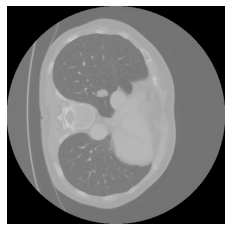

In [5]:
volume=grayToColored('D:/GP/volume-0.nii','D:/GP/segmentation-0.nii')
animate(volume,'Overlay2.gif')